<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/7-classification_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/a-single-neuron).**

---


# Introduction #

In the tutorial we learned about the building blocks of neural networks: *linear units*. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

The *Red Wine Quality* dataset consists of physiochemical measurements from about 1600 Portuguese red wines.  Also included is a quality rating for each wine from blind taste-tests. 

First, run the next cell to display the first few rows of this dataset.

In [1]:
import pandas as pd
from IPython.display import display

df = pd.read_csv('credit_cards_dataset.csv')

In [2]:
input_shape = len(df.columns) -1

In [3]:
#for setting up train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
y = df['default.payment.next.month']
X = df.drop(columns = 'default.payment.next.month')

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 24)
(6000, 24)
(24000,)
(6000,)


In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

In [10]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1024)              25600     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                        

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/1000
94/94 [==============================] - 13s 117ms/step - loss: 0.5924 - accuracy: 0.7514 - val_loss: 0.4780 - val_accuracy: 0.7808
Epoch 2/1000
94/94 [==============================] - 11s 116ms/step - loss: 0.4788 - accuracy: 0.8044 - val_loss: 0.4569 - val_accuracy: 0.8058
Epoch 3/1000
94/94 [==============================] - 11s 117ms/step - loss: 0.4608 - accuracy: 0.8115 - val_loss: 0.4471 - val_accuracy: 0.8122
Epoch 4/1000
94/94 [==============================] - 10s 111ms/step - loss: 0.4482 - accuracy: 0.8140 - val_loss: 0.4435 - val_accuracy: 0.8105
Epoch 5/1000
94/94 [==============================] - 11s 115ms/step - loss: 0.4442 - accuracy: 0.8167 - val_loss: 0.4449 - val_accuracy: 0.8182
Epoch 6/1000
94/94 [==============================] - 11s 116ms/step - loss: 0.4413 - accuracy: 0.8163 - val_loss: 0.4393 - val_accuracy: 0.8132
Epoch 7/1000
94/94 [==============================] - 11s 115ms/step - loss: 0.4368 - accuracy: 0.8172 - val_loss: 0.4382 - val_ac

Minimum Validation Loss: 0.4348


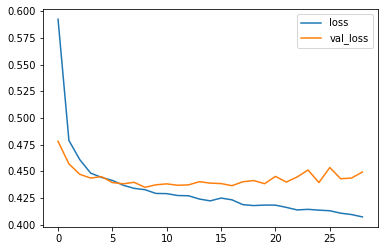

In [14]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
#making the predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
conf_matr = confusion_matrix(y_test, y_pred)

TP = conf_matr[0,0]; FP = conf_matr[0,1]; TN = conf_matr[1,1]; FN = conf_matr[1,0]
print('Confusion Matrix : ')
print(conf_matr)
print()
print('True Positive (TP)  : ',TP)
print('False Positive (FP) : ',FP)
print('True Negative (TN)  : ',TN)
print('False Negative (FN) : ',FN)

Confusion Matrix : 
[[4412  251]
 [ 838  499]]

True Positive (TP)  :  4412
False Positive (FP) :  251
True Negative (TN)  :  499
False Negative (FN) :  838
